<a href="https://colab.research.google.com/github/Masoomas98/UNetWaveDeform/blob/main/Pytorch/PyTorch_fundamental_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn #nn contains all the PyTorch's building blocks (layers) for neural networks
import matplotlib.pyplot as plt
from matplotlib import colors


In [ ]:
torch.__version__

'2.0.1+cu118'

In [ ]:
#Data (Preparing and loading) could be video, audio, images, excel spreadsheet, text DNA

#Two main parts for ML/DL
# 1. Put data in numerical representation.
# 2. Build up a model to learn patterns in that numerical data

#create parameters (parameters are something our model will learn)
weights=0.7
bias=0.3
# we will use a regression formula to make a straight line
#some valuesof x
X = torch.arange(0,1,0.02).unsqueeze(dim=1) #a vector for now
Y= weights * X + bias
print(X[:10],Y[:10])
print(len(X),len(Y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 50


#TEST_TRAIN SPLIT
one of the important things in ML .
plot the train test data with predictions

In [ ]:
train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

print(len(X_test), len(X_train))
print(len(Y_test), len(Y_train))

10 40
10 40


# Plotting data to see how it looks


In [ ]:
#plot training testing data alongwith the truth and the predictions
def plot_predictions(train_data=X_train, train_label=Y_train, test_data=X_test , test_label=Y_test, predictions=None):
  plt.scatter(train_data, train_label, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_label, c="r", s=4, label="Test data")
  #If predictions exist then plot them too against the test data
  if predictions is not None:
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")
  plt.legend()

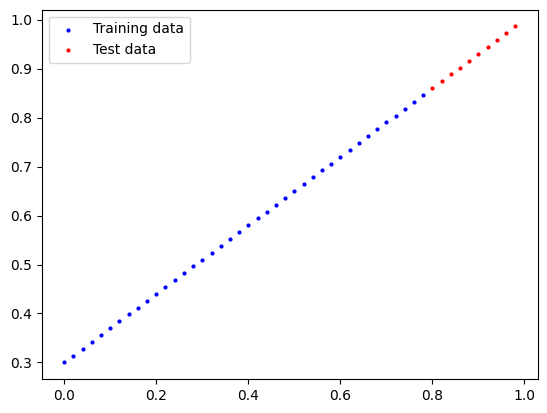

In [ ]:
plot_predictions()

# Building a model
### first it takes random valuesweights and bias, look at the training data and tries to adjust values closer to the training labels.
It does this using two algorithms:
Gradient descent and back propagation.

In [ ]:

from torch import nn
#Create a torch linear regression model
class Linear_Regression(nn.Module): #(Everything in nn.module for pytorch neural networks, inbuilt layers etc)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad= True, dtype= torch.float))
    self.bias =nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias



# Checking parameters in the model
create random seed, find the values and names of parameters


In [ ]:
torch.manual_seed(42)

In [ ]:
model_0= Linear_Regression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making prediction using torch.inference_mode()

To check our model's predictive power, let's see how well it predicts y_test based on X_test.

When we pass data through our model, it's going to run it through the forward() method.

In [ ]:
y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
Y_test, y_preds

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

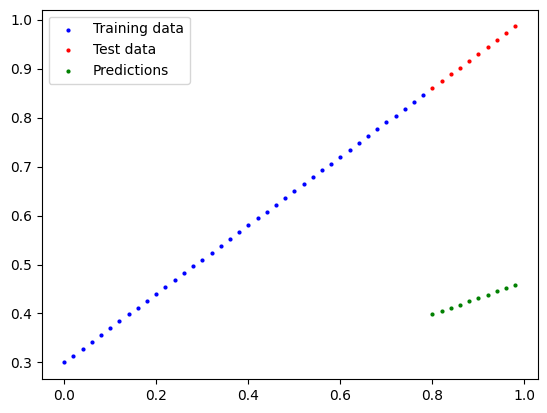

In [ ]:
plot_predictions(predictions =y_preds)

In [ ]:
# TRAIN MODEL
#Set up loss function and optimizer
#Loss function = how poorly or efficiently model is performing
# optimizer= slightly nudges the model parameters like weights and biases to improve/ lower the loss function
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr= 0.01)


In [ ]:
# in order to train first of all:
#set the hyperparameters
# loop through the data

# all other steps will be within the loop

# forward pass or forward propagation (ivolving data moving through our model's forward() function to make predictions)
# calculate the loss (comapriosn of forward pass [predictions to the truth label)
# optimizer zero grad
# loss backward (moves backward throught the network to calculate gradients of each parameters of our model )
# optimizer step (use optimizer to adjust model's parameters to try and improve the loss.)

torch.manual_seed(42)
epochs = 200
epoch_values=[]
loss_values=[]
test_loss_values=[]
#Loop for training
for epoch in range(epochs):
  model_0.train() #Train mode in pytorch

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_func(y_pred, Y_train)
  # 3. Optimizer
  optimizer.zero_grad()
  # 4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter)
  loss.backward()

  # 5. Step the optimizer ,   by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop
  optimizer.step()

  # Testing
  model_0.eval() #turns off gradient tracking
  with torch.inference_mode():
# with torch.no_grad():
    #forward pass
    test_pred = model_0(X_test)
  #calculate loss
    test_loss = loss_func(test_pred, Y_test)

    #Print out what's happening
  if epoch % 10==0:
    epoch_values.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

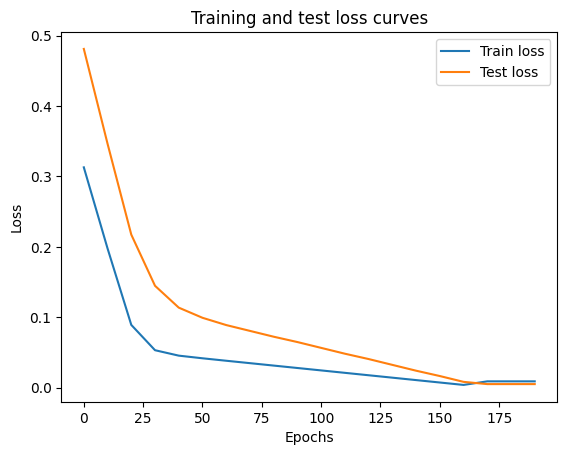

In [ ]:
#Plot the loss curves
plt.plot(epoch_values, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_values, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [ ]:
weights, bias
with torch.inference_mode():
  y_preds_new = model_0(X_test)

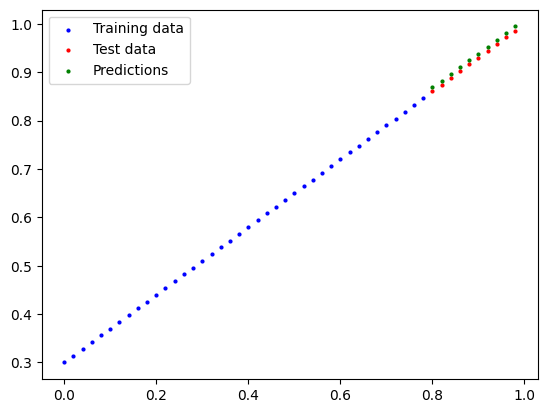

In [ ]:
plot_predictions(predictions = y_preds_new)

# Saving a model in PyTorch

## There are three main methods to know about saveing and loading a model.

### 1. torch. save() allows you to save the PyTorch object using pickle utility.
### 2. torhc.load() allows to unpickle and load the object.
### 3. torch.nn.Module.load_state_dict() contains infromation about optimizer's and hyperparameters used.

In [ ]:
from pathlib import Path
# Create model's directory
model_path = Path("models")
model_path.mkdir(parents= True,exist_ok=True)
# Create model save path
model_name = "01_pytorch_workflow.pth"
model_save_path = model_path / model_name

model_save_path


# Save the model state dict
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_0.state_dict(),f=model_save_path)





Saving model to: models/01_pytorch_workflow.pth


In [ ]:
ls -l models


total 8
-rw-r--r-- 1 root root 1183 Jul  8 21:25 01_pytorch_workflow01.pth
-rw-r--r-- 1 root root 1111 Jul  8 21:27 01_pytorch_workflow.pth


# Loading back models
## since we saved our model's state_dict rather than entire model, so we'll create a new instance of our model class and load the saved state_dict into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# to load a saved state_dict we need an instance for our model class
loaded_model_0 = Linear_Regression()

#Load the saved state_dict of model_0 (this will update new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
#Make some model predictions
model_0.eval()
with torch.inference_mode():
  y_preds =model_0(X_test)
y_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

# Let's put it all together
# go through step by step and see how it comes out altogether


In [ ]:
import torch
from torch import nn
from matplotlib.pyplot import plot

#check pytorch version
torch.__version__

'2.0.1+cu118'

Create device_agnostic code
this means if we've got got GPU we will use that for potentially faster coding otherwse it's going to be CPU.

#Set up device agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available else "cpu"
print(f"Using device: {device}")


Using device: cuda


# 1. Data

In [ ]:
#create some data using linear regression formula
weight= 0.7
bias = 0.3

#create range of values for x
x=torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * x + bias
x[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#Split the data
train_split = int(0.7*len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:] ,y[train_split:]
len(x_test), len(y_test), len(x_train), len(y_train)


(15, 15, 35, 35)

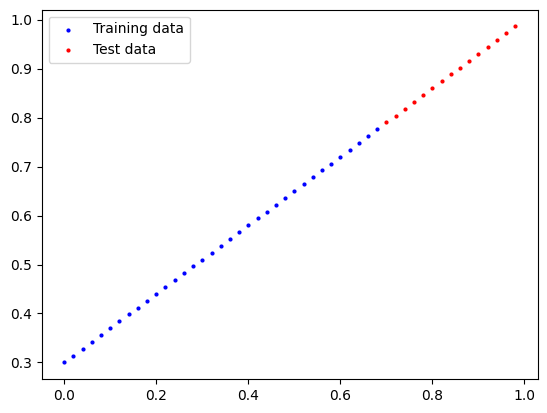

In [ ]:
plot_predictions(x_train,y_train,x_test,y_test)

# 2. Build a PyTorch linear model

In [ ]:
from torch import nn
#Create a linear model by subclassing nn.module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model's parameters
    self.linear_layer = nn.Linear(in_features =1, out_features = 1) # one in feature one out feature, #Just one layers right now, for each single input you will get one output so the output highly depends on what data are you feeding in.
 #Linear layer assigns weight and bias some values automatically

  def forward(self, x:torch.Tensor) ->torch.Tensor:
    return self.linear_layer(x)
# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#CHeck model's current device
next(model_1.parameters()).device


device(type='cpu')

In [ ]:
#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

# 3. Training
## For training we need
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
#Set up loss function
loss_fn = nn.L1Loss()

#Set up the optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr= 0.01, )



In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(x_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.551950991153717 | Test loss: 0.5713642835617065
Epoch: 10 | Loss: 0.44039100408554077 | Test loss: 0.44280412793159485
Epoch: 20 | Loss: 0.3288309872150421 | Test loss: 0.31424400210380554
Epoch: 30 | Loss: 0.21727101504802704 | Test loss: 0.18568386137485504
Epoch: 40 | Loss: 0.10571100562810898 | Test loss: 0.057123709470033646
Epoch: 50 | Loss: 0.01838926039636135 | Test loss: 0.04158676788210869
Epoch: 60 | Loss: 0.014880776405334473 | Test loss: 0.04029494896531105
Epoch: 70 | Loss: 0.012157226912677288 | Test loss: 0.03225714713335037
Epoch: 80 | Loss: 0.009436615742743015 | Test loss: 0.02496355026960373
Epoch: 90 | Loss: 0.006714305840432644 | Test loss: 0.017669953405857086
Epoch: 100 | Loss: 0.0039857360534369946 | Test loss: 0.01037636213004589
Epoch: 110 | Loss: 0.0038243115413933992 | Test loss: 0.01224341057240963
Epoch: 120 | Loss: 0.0038243115413933992 | Test loss: 0.01224341057240963
Epoch: 130 | Loss: 0.0038243115413933992 | Test loss: 0.01224341057

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds

tensor([[0.7915],
        [0.8054],
        [0.8193],
        [0.8331],
        [0.8470],
        [0.8609],
        [0.8747],
        [0.8886],
        [0.9025],
        [0.9164],
        [0.9302],
        [0.9441],
        [0.9580],
        [0.9718],
        [0.9857]], device='cuda:0')

TypeError: ignored

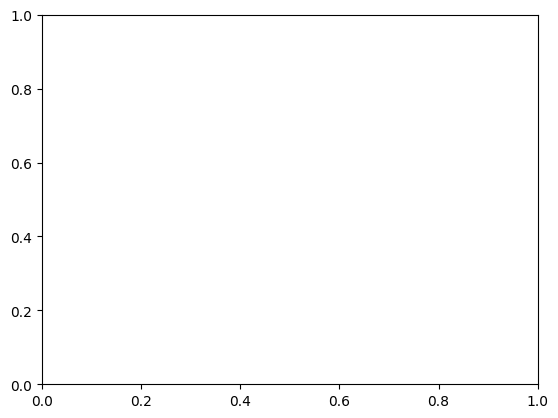

In [ ]:
# Check out our model predictions visually
plot_predictions(x_train, y_train, x_test, y_test, predictions=y_preds.cpu())


In [ ]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.9943]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0065], device='cuda:0'))])

In [ ]:
y_pred = y_pred.cpu()
y_pred

tensor([[0.8019],
        [0.8218],
        [0.8417],
        [0.8616],
        [0.8815],
        [0.9014],
        [0.9213],
        [0.9412],
        [0.9610],
        [0.9809]])

In [ ]:
from pathlib import Path

#Create Model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok =True)

#Create model save path
MODEL_NAME = "01_pytorch_workflow01.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow01.pth')

In [ ]:
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9943]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0065], device='cuda:0'))])

In [ ]:
#Load the model
loaded_model_1 =LinearRegressionModel()

#Load state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


#put the target/loaded model on device
loaded_model_1.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).to(device)

Parameter containing:
tensor([[0.9943]], device='cuda:0', requires_grad=True)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9943]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0065], device='cuda:0'))])

In [ ]:
#Evaluate the model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)
y_pred == loaded_model_1_preds

RuntimeError: ignored

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))